In [1]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# %matplotlib notebook
#Import data
csv_data = pd.read_csv("Resources/movie_metadata.csv", encoding="utf-8")
df = pd.DataFrame(csv_data)
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [2]:
df.count()

color                        5024
director_name                4939
num_critic_for_reviews       4993
duration                     5028
director_facebook_likes      4939
actor_3_facebook_likes       5020
actor_2_name                 5030
actor_1_facebook_likes       5036
gross                        4159
genres                       5043
actor_1_name                 5036
movie_title                  5043
num_voted_users              5043
cast_total_facebook_likes    5043
actor_3_name                 5020
facenumber_in_poster         5030
plot_keywords                4890
movie_imdb_link              5043
num_user_for_reviews         5022
language                     5031
country                      5038
content_rating               4740
budget                       4551
title_year                   4935
actor_2_facebook_likes       5030
imdb_score                   5043
aspect_ratio                 4714
movie_facebook_likes         5043
dtype: int64

In [3]:
df_clean=df.dropna()

In [4]:
df_clean.count()

color                        3756
director_name                3756
num_critic_for_reviews       3756
duration                     3756
director_facebook_likes      3756
actor_3_facebook_likes       3756
actor_2_name                 3756
actor_1_facebook_likes       3756
gross                        3756
genres                       3756
actor_1_name                 3756
movie_title                  3756
num_voted_users              3756
cast_total_facebook_likes    3756
actor_3_name                 3756
facenumber_in_poster         3756
plot_keywords                3756
movie_imdb_link              3756
num_user_for_reviews         3756
language                     3756
country                      3756
content_rating               3756
budget                       3756
title_year                   3756
actor_2_facebook_likes       3756
imdb_score                   3756
aspect_ratio                 3756
movie_facebook_likes         3756
dtype: int64

In [15]:
imdb=df_clean[["movie_title","imdb_score","duration","content_rating"]].sort_values(by=["imdb_score"],ascending=False)

In [16]:
imdb.head()

,movie_title,imdb_score,duration,content_rating
1937,The Shawshank Redemption,9.3,142.0,R
3466,The Godfather,9.2,175.0,R
66,The Dark Knight,9.0,152.0,PG-13
2837,The Godfather: Part II,9.0,220.0,R
339,The Lord of the Rings: The Return of the King,8.9,192.0,PG-13


##Rated G: General audiences – All ages admitted
Rated PG: Parental guidance suggested – Some material may not be suitable for children.
Rated PG-13: Parents strongly cautioned – Some material may be inappropriate for children under 13.
Rated R: Restricted – Under 17 requires accompanying parent or adult guardian.
Rated NC-17: No one 17 and under admitted.

In [26]:
imdb['content_rating'] = imdb['content_rating'].replace({'Unrated': 'Not Rated'})

In [17]:
imdb_rating_group=imdb.groupby(imdb["content_rating"])

In [19]:
imdb_rating_group.head()

,movie_title,imdb_score,duration,content_rating
1937,The Shawshank Redemption,9.3,142.0,R
3466,The Godfather,9.2,175.0,R
66,The Dark Knight,9.0,152.0,PG-13
2837,The Godfather: Part II,9.0,220.0,R
339,The Lord of the Rings: The Return of the King,8.9,192.0,PG-13
4498,"The Good, the Bad and the Ugly",8.9,142.0,Approved
1874,Schindler's List,8.9,185.0,R
3355,Pulp Fiction,8.9,178.0,R
836,Forrest Gump,8.8,142.0,PG-13
270,The Lord of the Rings: The Fellowship of the R...,8.8,171.0,PG-13


content_rating
Approved     [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
G            [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
GP           [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
M            [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
NC-17        [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
Not Rated    [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
PG           [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
PG-13        [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
Passed       [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
R            [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
Unrated      [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
X            [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
dtype: object

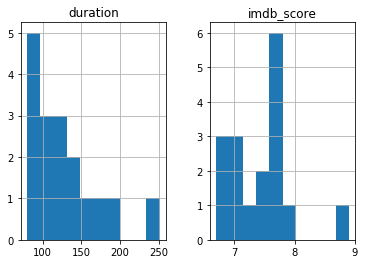

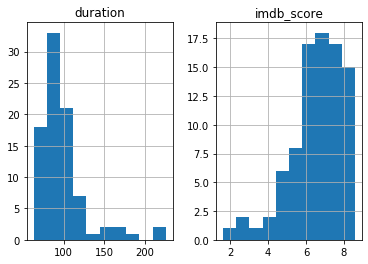

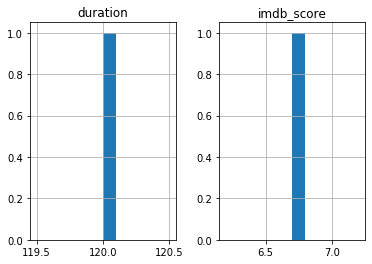

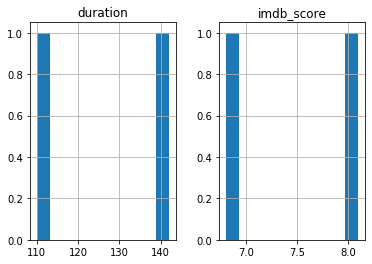

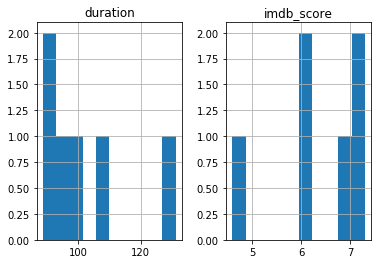

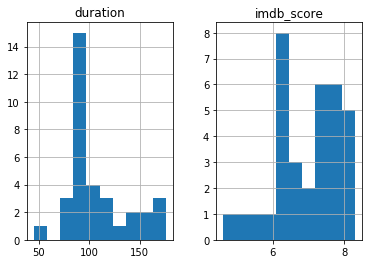

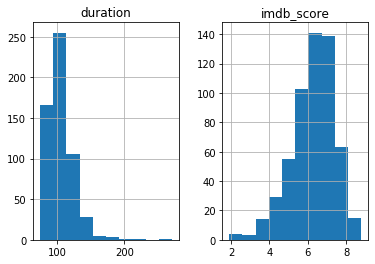

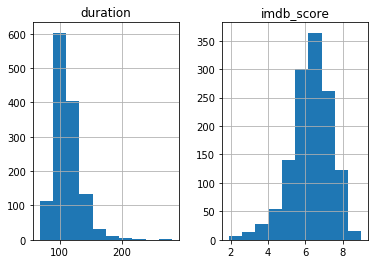

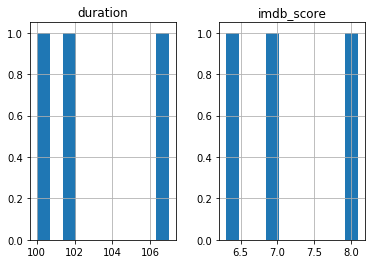

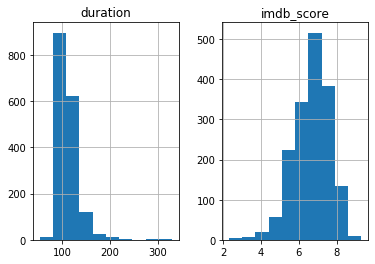

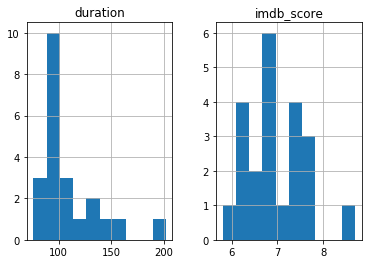

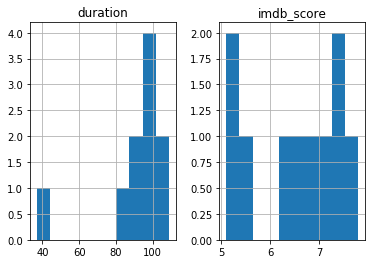

In [25]:
imdb_rating_group.hist()

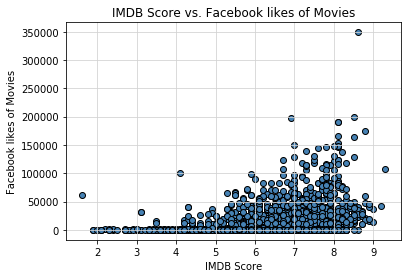

In [9]:
plt.scatter(df_clean["imdb_score"],df_clean["movie_facebook_likes"],edgecolors="black",facecolors="steelblue")
plt.title("IMDB Score vs. Facebook likes of Movies")
plt.xlabel("IMDB Score")
plt.ylabel("Facebook likes of Movies")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")


In [ ]:
df_clean["movie_facebook_likes"].value_counts()

## Duration distribution

<IPython.core.display.Javascript object>


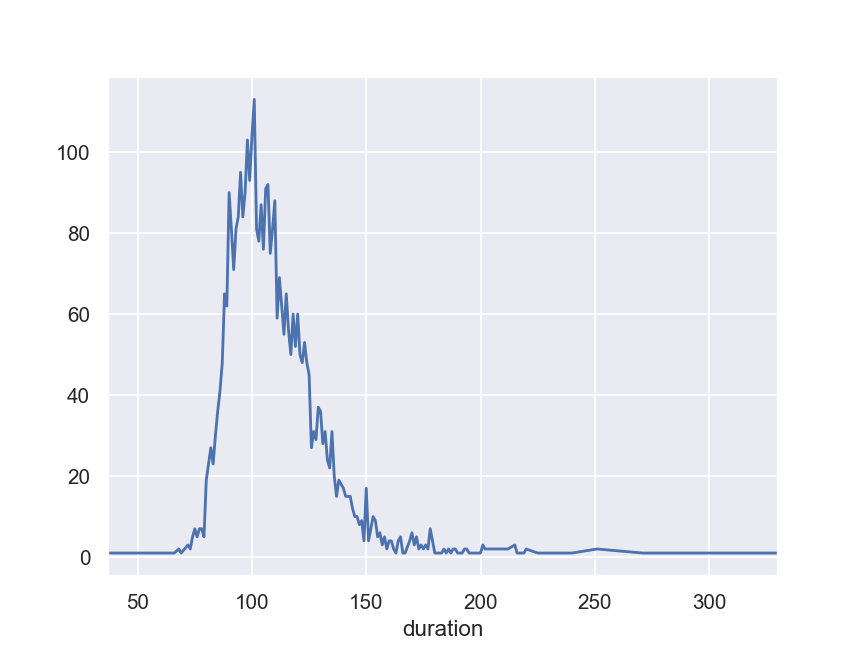

In [51]:
df_clean_groupby_duration = df_clean.groupby(['duration'])['movie_title'].count()
df_clean_groupby_duration.plot()

## Language exploratory

<IPython.core.display.Javascript object>


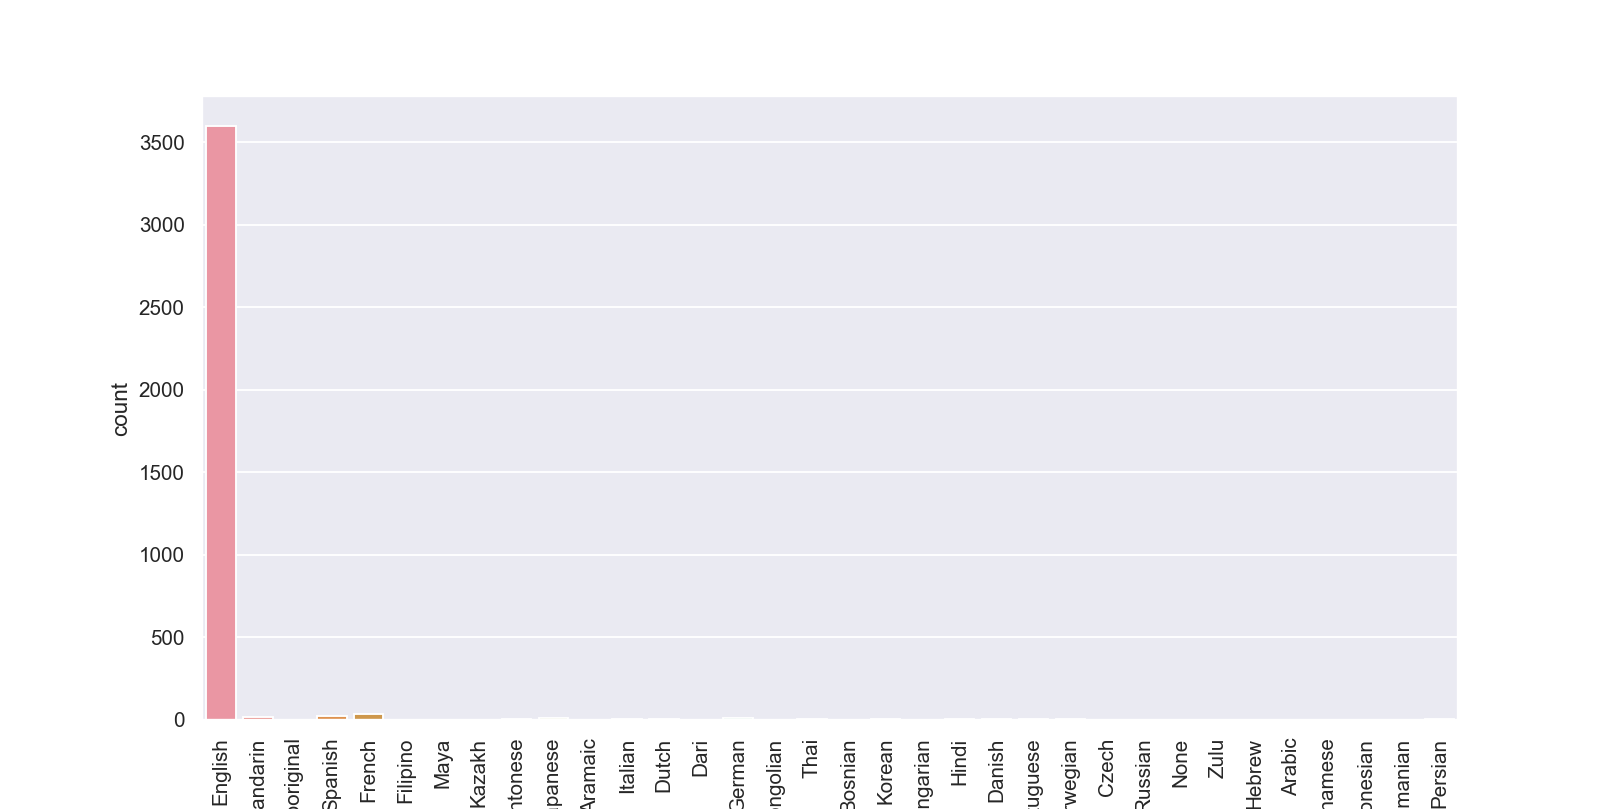

In [38]:
sns.set(style="darkgrid")
plt.figure(figsize = (12, 6))
sns.countplot(x="language", data = df_clean)
ax = plt.xticks(rotation=90)

## gross over year

<IPython.core.display.Javascript object>


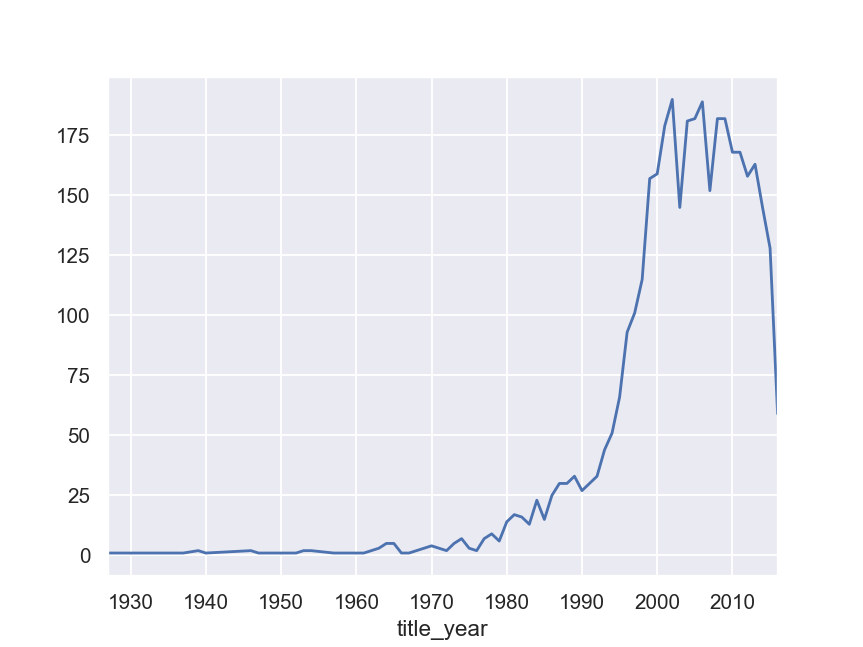

In [52]:
# plot title year vs gross
df_clean_groupby_gross = df_clean.groupby(['title_year'])['gross'].count()
df_clean_groupby_gross.plot()

### movie distribution across years

<IPython.core.display.Javascript object>


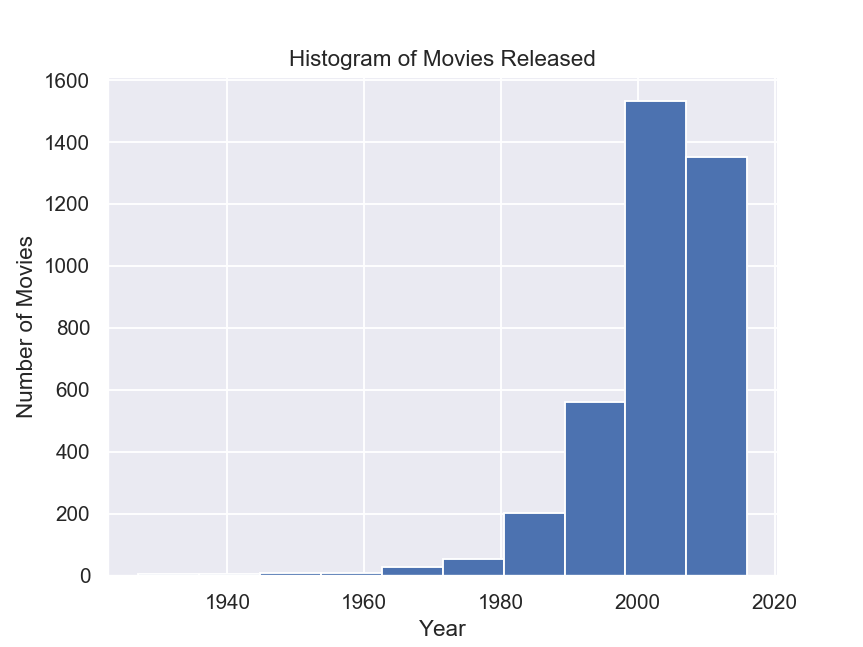

Text(0, 0.5, 'Number of Movies')

In [53]:
df_clean.hist("title_year")
plt.title("Histogram of Movies Released")
plt.xlabel("Year")
plt.ylabel("Number of Movies")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000252441BA550>]],
      dtype=object)

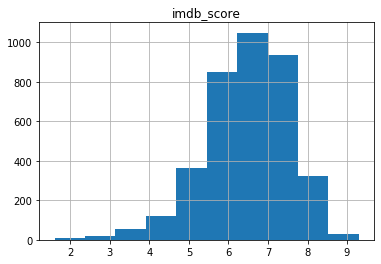

In [15]:
#most movies are have 5.5 to 7.5 IMDB score
df_clean.hist("imdb_score")
plt.xlabel("imdb_socre")
plt.ylabel("Number of Movies")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025244168438>]],
      dtype=object)

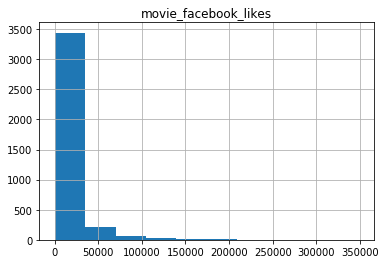

In [18]:
df_clean.hist("movie_facebook_likes")


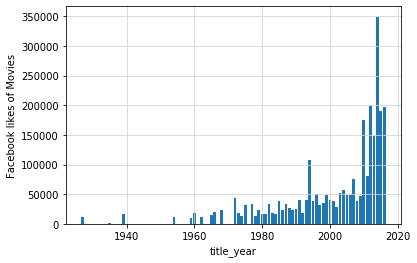

In [21]:
plt.bar(df_clean["title_year"],df_clean["movie_facebook_likes"])

plt.xlabel("title_year")
plt.ylabel("Facebook likes of Movies")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

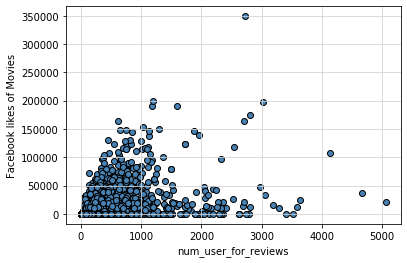

In [12]:
plt.scatter(df_clean["num_user_for_reviews"],df_clean["movie_facebook_likes"],edgecolors="black",facecolors="steelblue")

plt.xlabel("num_user_for_reviews")
plt.ylabel("Facebook likes of Movies")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

<IPython.core.display.Javascript object>


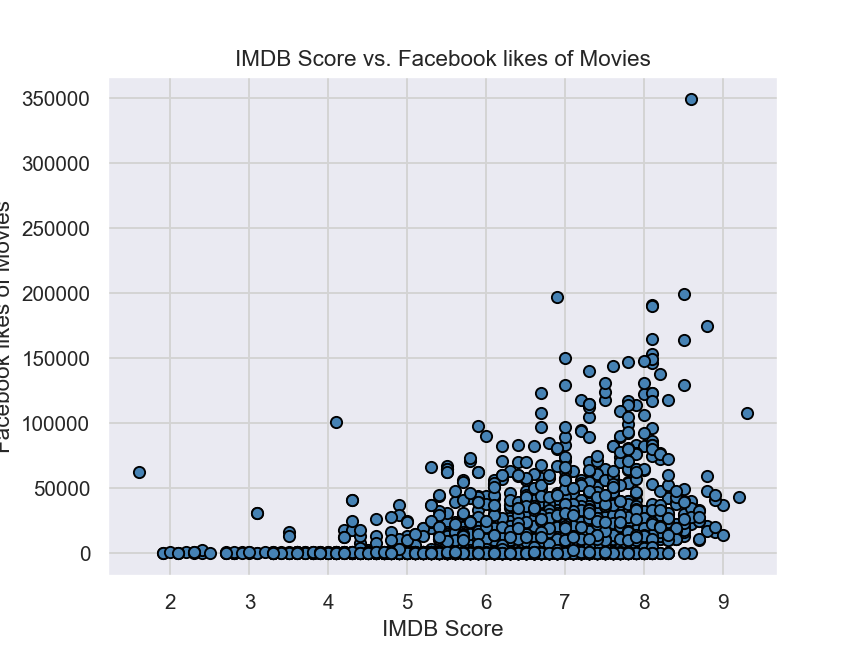

In [66]:
plt.scatter(df_clean["imdb_score"],df_clean["movie_facebook_likes"],edgecolors="black",facecolors="steelblue")
plt.title("IMDB Score vs. Facebook likes of Movies")
plt.xlabel("IMDB Score")
plt.ylabel("Facebook likes of Movies")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")